In [8]:
# Importing required packages/boilerplate code
import pandas as pd
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy

from static_helpers import *

sys.path.append('../')

directory = "creation"
file_name = "creation_dates_analysis.csv"
complete_path = os.path.join(directory, file_name)
df = []


if file_exists(complete_path):
    df = pd.read_csv(complete_path)
    print("File was successfully loaded in.")
else:
    print("FAIL: File was not loaded in.")
    
# print(df)

File was successfully loaded in.


In [9]:
# Add additional columns for the corrected/formatted dates.
df['Start Date Formatted'] = 0
df['Page Date Formatted'] = 0
df['Time Difference'] = 0
df['Days Difference'] = 0

for i, row in df.iterrows():
    unformatted_start_date = df.at[i, 'Start Date']
    unformatted_page_date = df.at[i, 'Page Creation Date']
    df.at[i, 'Start Date Formatted'] = datetime.strptime(unformatted_start_date, "%Y-%m-%d")
    df.at[i, 'Page Date Formatted'] = datetime.strptime(unformatted_page_date, "%Y-%m-%dT%H:%M:%SZ")
    
# print(df)


In [10]:
for i, row in df.iterrows():
    start_date = df.at[i, 'Start Date Formatted']
    page_date = df.at[i, 'Page Date Formatted']
    
    if (start_date < page_date):
        df.at[i, 'Time Difference'] = page_date - start_date
        df.at[i, 'Days Difference'] = df.at[i, 'Time Difference'].days
    else:
        print("The row below has a page created before the event!")
        print(df[['Titles', 'Start Date Formatted', 'Page Date Formatted']].loc[[i]], "\n\n")
    
print(df[['Titles', 'Start Date Formatted', 'Page Date Formatted', 'Time Difference']])

The row below has a page created before the event!
                     Titles Start Date Formatted  Page Date Formatted
4  Hong Kong 1 July marches  2019-07-01 00:00:00  2005-12-05 16:48:19 


The row below has a page created before the event!
                Titles Start Date Formatted  Page Date Formatted
17  Glory to Hong Kong  2019-09-12 00:00:00  2019-09-10 17:11:18 


                                           Titles Start Date Formatted  \
0                      2019–20 Hong Kong protests  2019-03-15 00:00:00   
1                 2019 Hong Kong extradition bill  2019-02-13 00:00:00   
2                         Murder of Poon Hiu-wing  2018-02-17 00:00:00   
3                                       Demosistō  2014-09-28 00:00:00   
4                        Hong Kong 1 July marches  2019-07-01 00:00:00   
5                        Civil Human Rights Front  2002-09-13 00:00:00   
6        Hong Kong Human Rights and Democracy Act  2014-11-20 00:00:00   
7        Chinese University of

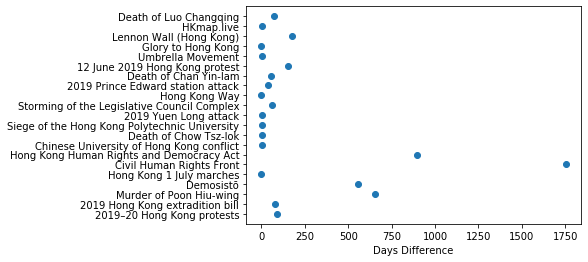

In [23]:
x = df['Days Difference'].tolist()
y = df['Titles'].tolist()


plt.scatter(x, y)
plt.xlabel("Days Difference")
# TODO: fix log scale
# plt.xscale("log")
plt.show()

In [ ]:
""